**Perbaikan Citra Berwarna**

---

### 1. Konsep Dasar

Perbaikan citra berwarna bertujuan untuk meningkatkan kualitas visual atau menyesuaikan tampilan warna citra agar lebih informatif atau menarik. Operasi ini dapat dilakukan dalam berbagai ruang warna seperti RGB, HSV, atau LAB. Perbaikan warna umumnya meliputi:

- Koreksi kontras dan kecerahan.
- Penyesuaian saturasi dan rona warna.
- Transformasi atau manipulasi saluran warna.
- Penerapan pseudo color untuk citra grayscale.

#### Penjelasan Ruang Warna:

- **RGB (Red, Green, Blue):** Model warna aditif yang merepresentasikan warna sebagai kombinasi dari tiga komponen dasar: merah, hijau, dan biru. Umum digunakan pada tampilan elektronik.

- **HSV (Hue, Saturation, Value):** Model warna yang merepresentasikan warna berdasarkan rona (hue), kejenuhan (saturation), dan nilai terang (value). Cocok untuk manipulasi warna karena memisahkan informasi warna dan pencahayaan.

- **LAB:** Ruang warna yang lebih mendekati persepsi manusia, terdiri dari channel **L** (luminance/kecerahan), **A** (komponen warna hijau-merah), dan **B** (komponen warna biru-kuning). Sering digunakan untuk tugas peningkatan kontras dan warna.

- **Pseudo Color:** Teknik pewarnaan citra grayscale dengan menggunakan peta warna (*colormap*) tertentu. Ini tidak merepresentasikan warna asli, namun digunakan untuk meningkatkan interpretasi visual (misalnya dalam citra medis atau peta).

---

### 2. Contoh Operasi Perbaikan Warna

| Teknik                             | Penjelasan                                                                 |
|-----------------------------------|---------------------------------------------------------------------------|
| Koreksi Kontras di RGB            | Menyesuaikan nilai intensitas setiap channel RGB                          |
| Histogram Equalization di HSV     | Equalisasi pada channel V (brightness) untuk mempertahankan warna alami   |
| CLAHE pada Channel L (LAB)        | Meningkatkan kontras dengan adaptif pada channel luminance                |
| Penerapan Pseudo Color            | Mengubah citra grayscale menjadi citra warna dengan skema warna tertentu  |

---






#  Koreksi Kontras di Ruang RGB

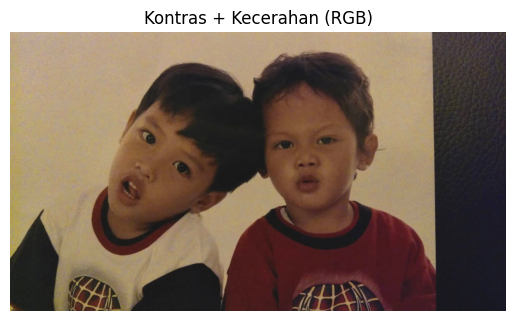

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('color_image.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

alpha = 1.2  # kontras
beta = 20    # kecerahan

adjusted = cv2.convertScaleAbs(img_rgb, alpha=alpha, beta=beta)

plt.imshow(adjusted)
plt.title("Kontras + Kecerahan (RGB)")
plt.axis('off')
plt.show()

# Histogram Equalization di HSV

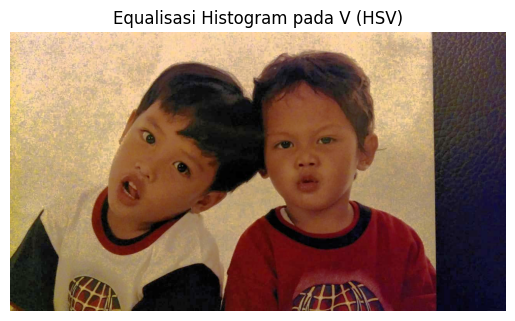

In [ ]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

v_eq = cv2.equalizeHist(v)
hsv_eq = cv2.merge((h, s, v_eq))
img_hsv_eq = cv2.cvtColor(hsv_eq, cv2.COLOR_HSV2RGB)

plt.imshow(img_hsv_eq)
plt.title("Equalisasi Histogram pada V (HSV)")
plt.axis('off')
plt.show()

#  CLAHE pada Channel L (LAB)

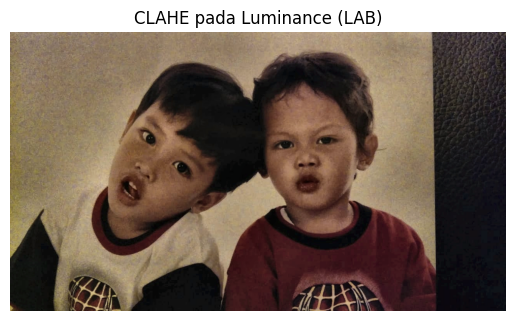

In [ ]:
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
l_clahe = clahe.apply(l)
lab_clahe = cv2.merge((l_clahe, a, b))
img_clahe = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2RGB)

plt.imshow(img_clahe)
plt.title("CLAHE pada Luminance (LAB)")
plt.axis('off')
plt.show()

# Pseudo Color

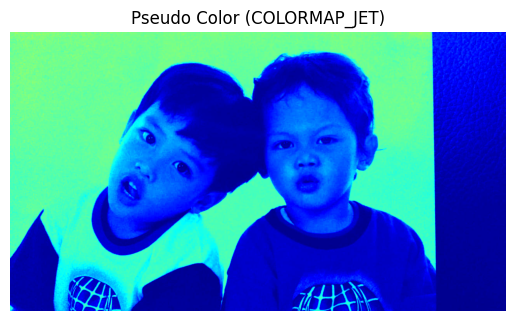

In [ ]:
gray = cv2.imread('/content/image (3).png', cv2.IMREAD_GRAYSCALE)
pseudo = cv2.applyColorMap(gray, cv2.COLORMAP_JET)

plt.imshow(cv2.cvtColor(pseudo, cv2.COLOR_BGR2RGB))
plt.title("Pseudo Color (COLORMAP_JET)")
plt.axis('off')
plt.show()


# 4. Kesimpulan

- Perbaikan citra berwarna dapat meningkatkan interpretabilitas citra secara signifikan.
- Penggunaan ruang warna seperti HSV dan LAB memungkinkan pengolahan yang lebih selektif terhadap atribut visual.
- Pseudo color bermanfaat untuk meningkatkan tampilan visual dari citra grayscale khususnya untuk aplikasi medis, peta topografi, dan termografi.
- Dengan Python dan OpenCV, perbaikan warna dapat dilakukan secara cepat dan fleksibel.

